# **ANALISIS DATA: STUDI KASUS (BIKE SHARING DATASET)**

----

Nama: Fauziah Reza Oktaviyani

Email: fzhokta@gmail.com

---
Data yang digunakan dapat diakses pada link [bike sharing dataset-kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data)

Data tersebut memiliki beberapa atribut:
*   instant: indeks tiap entri data
*   dteday: tanggal saat data diambil
*   season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin
*   yr: tahun (0: 2011, 1: 2012)
*   mnth: bulan (1 hingga 12)
*   hr: jam (0 hingga 23)
*   holiday: apakah data diambil ketika holiday atau tidak
*   weekday: hari dalam seminggu saat data diambil
*   workingday: hari kerja
*   weathersit: kondisi cuaca
    *  1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
    *  2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sebagian awan, Kabut
    *  3: Salju Ringan, Hujan Ringan + Badai petir + Awan berkepul-kepul, Hujan Ringan + Awan berkepul-kepul
    *  4: Hujan Lebat + Es butiran + Badai petir + Kabut, Salju + Kabut
*   temp: Suhu yang dinormalisasi dalam derajat Celsius
*   atemp: Suhu perasaan yang dinormalisasi dalam derajat Celsius
*   hum: Kelembaban yang dinormalisasi
*   windspeed: Kecepatan angin yang dinormalisasi
*   casual: Jumlah pengguna kasual
*   registered: Jumlah pengguna terdaftar
*   cnt: Jumlah total sepeda yang disewakan

---
# **Menentukan Pertanyaan Bisnis**

1.   Bagaimana pengaruh cuaca terhadap permintaan sepeda?
2.   Bagaimana variasi musiman dalam penggunaan sepeda?
3.   Bagaimana pengaruh hari libur terhadap penggunaan sepeda?
4.   Bagaimana perbandingan penggunaan sepeda oleh pengguna terdaftar dan kasual?

# **1. Persiapan Library**

disini saya menggunakan library:
*   `numpy` untuk melakukan operasi matematika, statistik, dsb.
*   `pandas` untuk membaca, manipulasi, analisis, simpan data dalam bentuk tabel
*   `matplotlib.pyplot` untuk membuat visualisasi grafil, plot, atau gambar
*   `seaborn` untuk membuat visualisasi data yang lebih menarik


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Data Wrangling**

## **2.1 Gathering Data**

Baca file data yang disimpan dalam format .csv serta dimuat ke dalam bentuk dataFrame menggunakan `pandas`

In [2]:
bike_hour_df = pd.read_csv("/content/drive/MyDrive/Data Analyst/Data/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_day_df = pd.read_csv("/content/drive/MyDrive/Data Analyst/Data/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## **2.2 Assessing Data**

### 2.2.1 Periksa informasi dari data

In [4]:
print("==== data per jam ====")
bike_hour_df.info()
print("\n")
print("==== data per hari ====")
bike_day_df.info()

==== data per jam ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


==== data per hari ====


Terlihat pada informasi di atas bahwa `bike_hour_df` memiliki 17 kolom dengan jumlah barisnya 17379 yang bernilai non-null, serta tipe data `int64` sebanyak 12, `float64` sebanyak 4, dan `object` 1, sedangkan `bike_day_df` memiliki 16 kolom dengan jumlah barisnya 731 yang bernilai non-null, serta tipe data `int64` sebanyak 11, `float64` sebanyak 4, dan `object` 1.

Setelah mengetahui informasi tersebut, didapatkan beberapa kesalahan pada tipe data atribut `dteday` yang seharusnya bertipe data `datetime64`

### 2.2.2 Cek missing value

In [5]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan informasi diatas, dapat dilihat bahwa tidak ada *missing value* pada masing-masing data

### 2.2.3 Cek duplikasi data

In [7]:
print("Jumlah duplikasi pada data rental per jam: ", bike_hour_df.duplicated().sum())
print("Jumlah duplikasi pada data rental per hari: ", bike_day_df.duplicated().sum())

Jumlah duplikasi pada data rental per jam:  0
Jumlah duplikasi pada data rental per hari:  0


Berdasarkan informasi di atas, dapat dilihat bahwa tidak ada data yang duplikat

### 2.2.4 Periksa parameter statistik dari kolom numerik

In [8]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Bisa dilihat pada informasi parameter statistik di atas bahwa parameter statistik pada tiap data sudah sesuai dengan atribut masing-masing

## **2.3 Data Cleaning**

Data cleaning dilakukan untuk memperbaiki tipe data dari atribut `dteday` yang awalnya bertipe `object` menjadi `datetime64`. Proses ini dapat dilakukan menggunakan `function to_datetime()` yang disediakan oleh library `pandas`

In [10]:
bike_day_df.dteday = pd.to_datetime(bike_day_df.dteday)
bike_hour_df.dteday = pd.to_datetime(bike_hour_df.dteday)

Setelah itu saya lakukan pengecekan lagi untuk memastikan bahwa tipe data sudah berubah

In [11]:
bike_day_df.info()
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# **3. Exploratory Data Analysis (EDA)**

Pada data yang saya gunakan terdapat keterangan pada masing-masing atribut yang dapat dilihat pada tabel di bawah:

|  Kolom Data  | Keterangan |
|--------------|------------|
| `season`     | Telah diubah dari data berjenis *string* menjadi data numerik melalui proses *label encoding*. |
| `yr`         | Telah diubah menjadi data numerik dengan urutan tahun melalui proses *ordinal encoding*. |
| `holiday`    | Telah diubah dari data bertipe *string* menjadi nilai *boolean* melalui proses *binary encoding*. |
| `weekday`    | Telah diubah menjadi data numerik dengan urutan hari melalui proses *ordinal encoding*. |
| `workingday` | Telah diubah dari data bertipe *string* menjadi nilai *boolean* melalui proses *label encoding*. |
| `weathersit` | Telah diubah dari tingkatan jenis cuaca yang awalnya bertipe *string* menjadi data numerik melalui proses *ordinal encoding*. |
| temp, atemp, hum, dan windspeed     | Telah mengalami normalisasi dengan pembagian nilainya menjadi nilai maksimum yang telah ditentukan. |

## **3.1 Pengembalian Nilai Atribut**

In [12]:
bike_hour_df.describe(include="all")

<ipython-input-12-cae3271f9281>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Seperti yang terlihat di atas dan berdasar keterangan yang di dapat bahwa data sudah melalui tahap `label` dan `ordinal decoding`. Oleh karena itu perlu mengembalikan nilai aslinya, tapi sebelum itu perlu menyalin dataset dulu agar data yang asli tetap terjaga.

In [13]:
backup_day_df = bike_day_df.copy(deep=True)
backup_hour_df = bike_hour_df.copy(deep=True)

In [14]:
bike_day_df.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'mnth' : {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Mei',6:'Jun',
             7:'Jul',8:'Agt',9:'Sept',10:'Okt',11:'Nov',12:'Des'},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

bike_hour_df.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'mnth' : {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Mei',6:'Jun',
              7:'Jul',8:'Agt',9:'Sept',10:'Okt',11:'Nov',12:'Des'},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

In [15]:
columns_to_check = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']

print('bike_day_df Unique Value')
for column in columns_to_check:
    unique_values = bike_day_df[column].unique()
    print(f'{column}: {unique_values}')

print('\nbike_hour_df Unique Value')
for column in columns_to_check:
    unique_values = bike_hour_df[column].unique()
    print(f'{column}: {unique_values}')

bike_day_df Unique Value
season: ['Springer' 'Summer' 'Fall' 'Winter']
yr: [2011 2012]
mnth: ['Jan' 'Feb' 'Mar' 'Apr' 'Mei' 'Jun' 'Jul' 'Agt' 'Sept' 'Okt' 'Nov' 'Des']
holiday: ['Not Holiday' 'Holiday']
workingday: ['Holiday' 'Working Day']
weekday: ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit: ['Mist + Cloudy' 'Clear' 'Light Snow']

bike_hour_df Unique Value
season: ['Springer' 'Summer' 'Fall' 'Winter']
yr: [2011 2012]
mnth: ['Jan' 'Feb' 'Mar' 'Apr' 'Mei' 'Jun' 'Jul' 'Agt' 'Sept' 'Okt' 'Nov' 'Des']
holiday: ['Holiday' 'Not Holiday']
workingday: ['Holiday' 'Working Day']
weekday: ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit: ['Clear' 'Mist + Cloudy' 'Light Snow' 'Heavy Rain']


In [16]:
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,Jan,Not Holiday,Sun,Holiday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,Jan,Not Holiday,Mon,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,Not Holiday,Tue,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,Not Holiday,Wed,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


## **3.2 Periksa Distribusi Data**

In [18]:
columns_to_count = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
print('bike_day_df Data Distribution\n')

for column in columns_to_count:
    print(f"{bike_day_df[column].value_counts().sort_index()}\n")

bike_day_df Data Distribution

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

2011    365
2012    366
Name: yr, dtype: int64

Agt     62
Apr     60
Des     62
Feb     57
Jan     62
Jul     62
Jun     60
Mar     62
Mei     62
Nov     60
Okt     62
Sept    60
Name: mnth, dtype: int64

Holiday         21
Not Holiday    710
Name: holiday, dtype: int64

Holiday        231
Working Day    500
Name: workingday, dtype: int64

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64



In [19]:
columns_to_count = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
print('bike_hour_df Data Distribution\n')

for column in columns_to_count:
    print(f"{bike_hour_df[column].value_counts().sort_index()}\n")

bike_hour_df Data Distribution

Fall        4496
Springer    4242
Summer      4409
Winter      4232
Name: season, dtype: int64

2011    8645
2012    8734
Name: yr, dtype: int64

Agt     1475
Apr     1437
Des     1483
Feb     1341
Jan     1429
Jul     1488
Jun     1440
Mar     1473
Mei     1488
Nov     1437
Okt     1451
Sept    1437
Name: mnth, dtype: int64

Holiday        16879
Not Holiday      500
Name: holiday, dtype: int64

Holiday         5514
Working Day    11865
Name: workingday, dtype: int64

Fri    2487
Mon    2479
Sat    2512
Sun    2502
Thu    2471
Tue    2453
Wed    2475
Name: weekday, dtype: int64

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64



array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

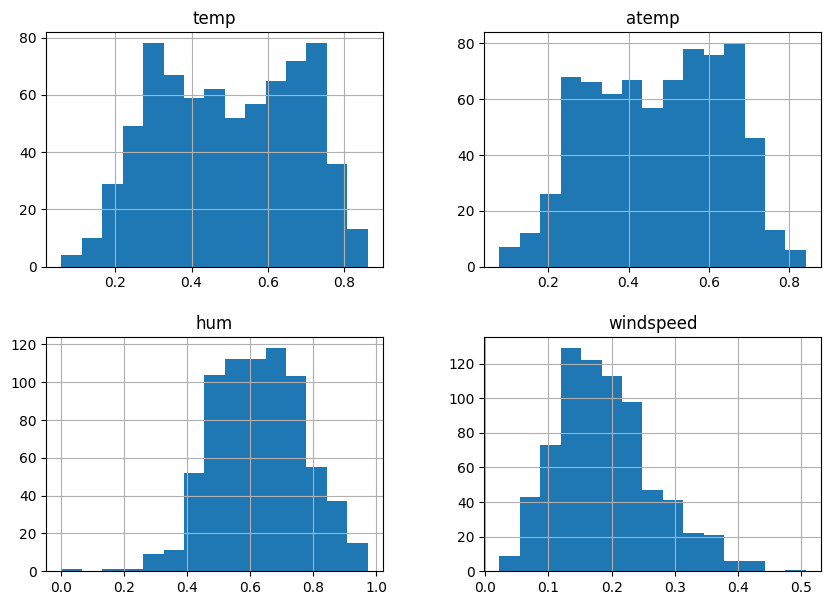

In [20]:
num_day_df = bike_day_df[['temp', 'atemp', 'hum', 'windspeed']]
num_day_df.hist(bins=15, figsize=(10, 7))

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

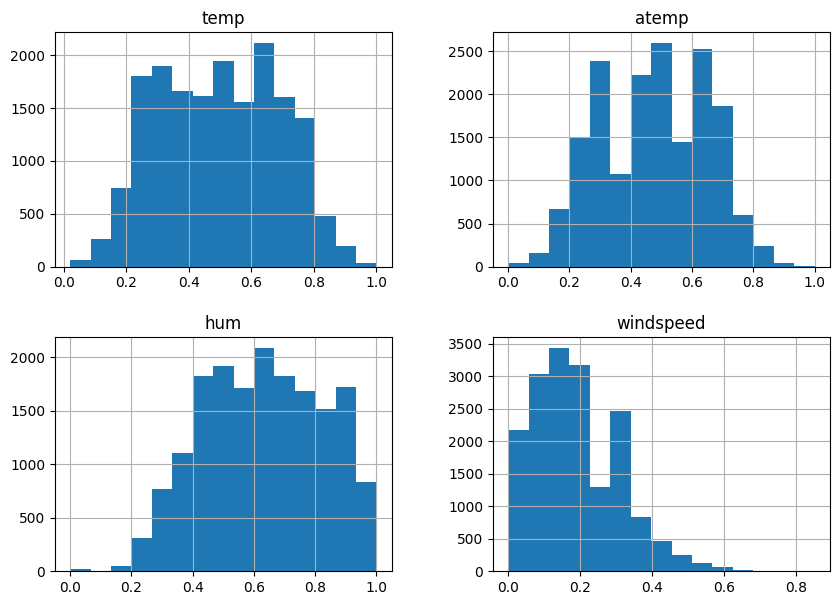

In [21]:
num_hour_df = bike_hour_df[['temp', 'atemp', 'hum', 'windspeed']]
num_hour_df.hist(bins=15, figsize=(10, 7))

## **3.2 Explore bike_day_df**

In [22]:
bike_day_df.groupby(by="weathersit").agg({
    'registered':['mean','max','min'],
    'casual':['mean','max','min']
})

registered                 casual          
                      mean   max  min        mean   max min
weathersit                                                 
Clear          3912.755940  6946  416  964.030238  3410  15
Light Snow     1617.809524  4324   20  185.476190  1264   2
Mist + Cloudy  3348.510121  6844  491  687.352227  3155   9

In [23]:
bike_day_df.groupby(by="season").agg({
    'registered':['mean','max','min'],
    'casual':['mean','max','min']
})

registered                  casual           
                 mean   max  min         mean   max  min
season                                                  
Fall      4441.691489  6917  889  1202.611702  3160  118
Springer  2269.204420  5315  416   334.928177  3155    9
Summer    3886.233696  6456  674  1106.097826  3410  120
Winter    3999.050562  6946   20   729.112360  3031    2

In [24]:
bike_day_df.groupby(by="holiday").agg({
    'registered':['mean','max','min'],
    'casual':['mean','max','min']
})

registered                  casual           
                    mean   max  min         mean   max  min
holiday                                                    
Holiday      2670.285714  5172  573  1064.714286  3065  117
Not Holiday  3685.332394  6946   20   841.771831  3410    2

In [25]:
bike_day_df.groupby(by="mnth").agg({
    'registered':['mean','max','min'],
    'casual':['mean','max','min']
})

registered                   casual           
             mean   max   min         mean   max  min
mnth                                                 
Agt   4502.500000  6541   889  1161.919355  2827  226
Apr   3471.533333  5950   674  1013.366667  3252  120
Des   3053.919355  6055   432   349.887097  1153    9
Feb   2392.789474  4546   905   262.508772  1435   47
Jan   1982.112903  4185   416   194.225806  1070    9
Jul   4303.080645  6790  2298  1260.596774  3065  562
Jun   4540.600000  6456  2993  1231.766667  2963  477
Mar   2975.419355  5893   491   716.838710  3155   46
Mei   4135.500000  6433  2213  1214.274194  3410  255
Nov   3637.133333  5520   935   610.050000  2290   69
Okt   4235.354839  6911    20   963.870968  3031    2
Sept  4594.466667  6946  1689  1172.050000  3160  118

## **3.3 Explore bike_hour_df**

In [26]:
bike_hour_df.groupby(by="weathersit").agg({
    'registered':['mean','max','min'],
    'casual':['mean','max','min']
})

registered              casual         
                     mean  max min       mean  max min
weathersit                                            
Clear          164.323841  886   0  40.545431  367   0
Heavy Rain      71.666667  158  22   2.666667    6   1
Light Snow      95.523608  791   0  16.055673  263   0
Mist + Cloudy  145.570202  822   0  29.595290  350   0

# **4. Visualization & Explanatory Analysis**

## **Q1 : Berapa banyak orang yang menyewa sepeda, per jam, bulan, dan tahun?**

### Per Jam

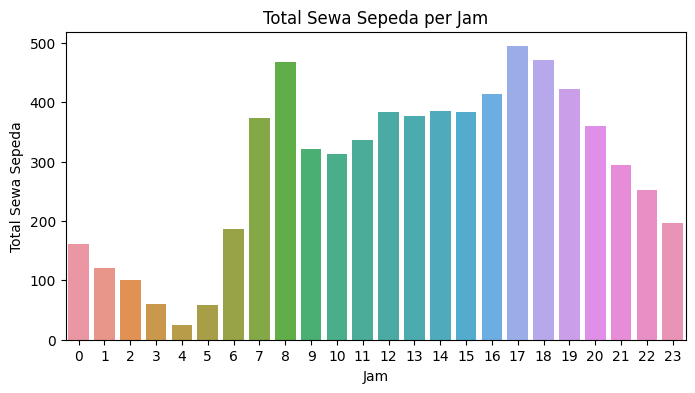

In [27]:
total_sewa_per_jam = bike_hour_df.groupby('hr')['cnt'].nunique().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

plt.figure(figsize=(8, 4))
sns.barplot(x='hr', y='Total Sewa Sepeda', data=total_sewa_per_jam)
plt.title('Total Sewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Sewa Sepeda')
plt.show()

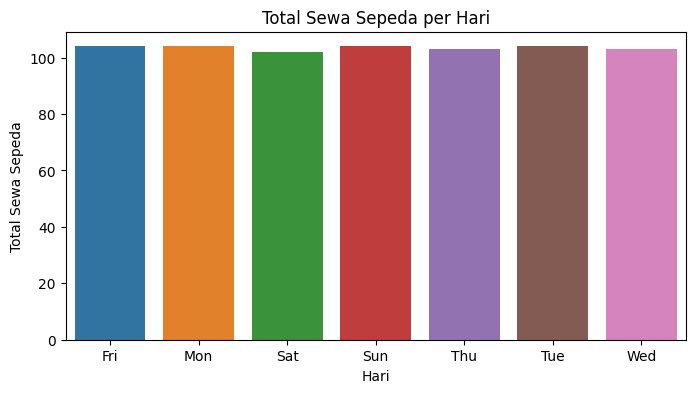

In [28]:
total_sewa_per_hari = bike_day_df.groupby('weekday')['cnt'].nunique().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

plt.figure(figsize=(8, 4))
sns.barplot(x='weekday', y='Total Sewa Sepeda', data=total_sewa_per_hari)
plt.title('Total Sewa Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Total Sewa Sepeda')
plt.show()

### Per Bulan

In [40]:
total_sewa_per_bulan = bike_day_df.groupby('mnth')['cnt'].sum().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})
print (total_sewa_per_bulan)

    mnth  Total Sewa Sepeda
0    Agt             351194
1    Apr             269094
2    Des             211036
3    Feb             151352
4    Jan             134933
5    Jul             344948
6    Jun             346342
7    Mar             228920
8    Mei             331686
9    Nov             254831
10   Okt             322352
11  Sept             345991


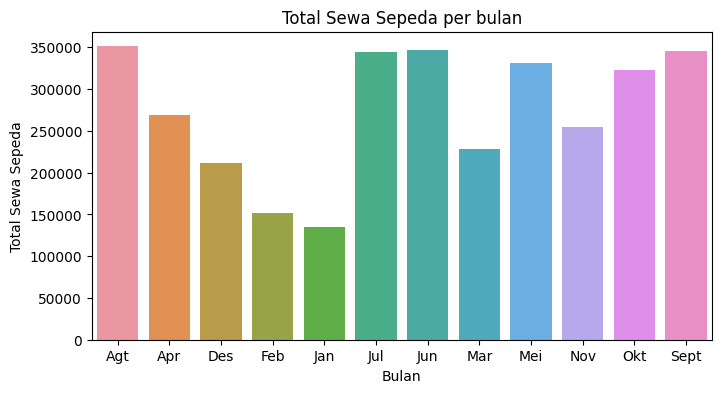

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(x='mnth', y='Total Sewa Sepeda', data=total_sewa_per_bulan)
plt.title('Total Sewa Sepeda per bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Sewa Sepeda')
plt.show()

### Per Tahun

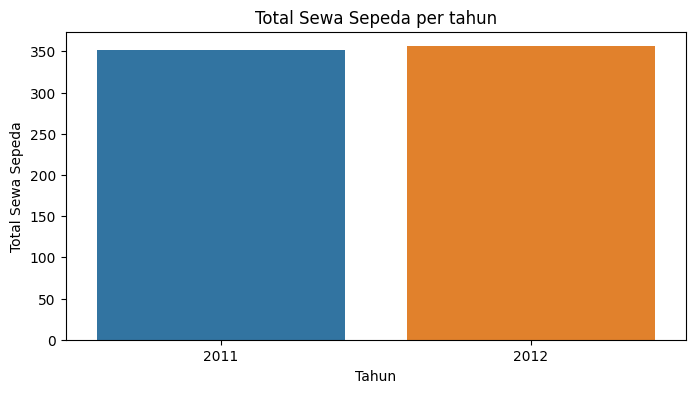

In [30]:
total_sewa_per_tahun = bike_day_df.groupby('yr')['cnt'].nunique().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

plt.figure(figsize=(8, 4))
sns.barplot(x='yr', y='Total Sewa Sepeda', data=total_sewa_per_tahun)
plt.title('Total Sewa Sepeda per tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Sewa Sepeda')
plt.show()

## **Q2 : Apakah cuaca buruk mengurangi jumlah peminjaman?**

berikut ini merupakan visualisasi dampak tiap bulan

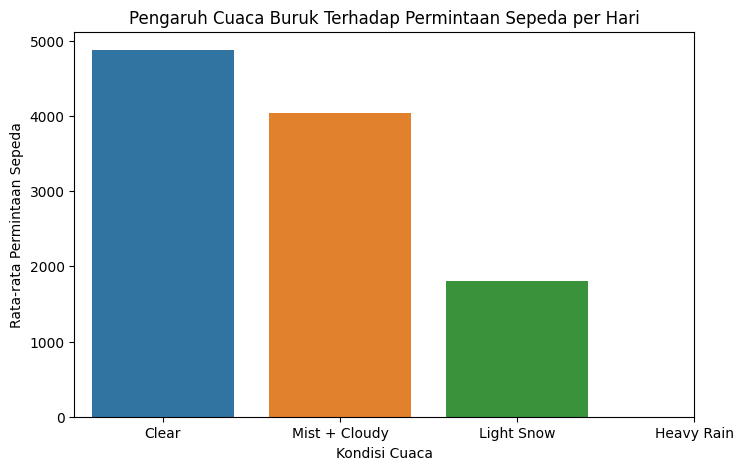

In [42]:
cuaca_vs_permintaan_day = bike_day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=cuaca_vs_permintaan_day)
plt.title('Pengaruh Cuaca Buruk Terhadap Permintaan Sepeda per Hari')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'])
plt.show()

## **Q3 : Apakah ada peningkatan yang konsisten pada musim tertentu?**

In [43]:
rentals_per_season = bike_day_df.groupby('season')['cnt'].nunique().reset_index()
rentals_per_season.rename(columns={'cnt': 'sum'}, inplace=True)
rentals_per_season

,season,sum
0,Fall,188
1,Springer,179
2,Summer,182
3,Winter,176


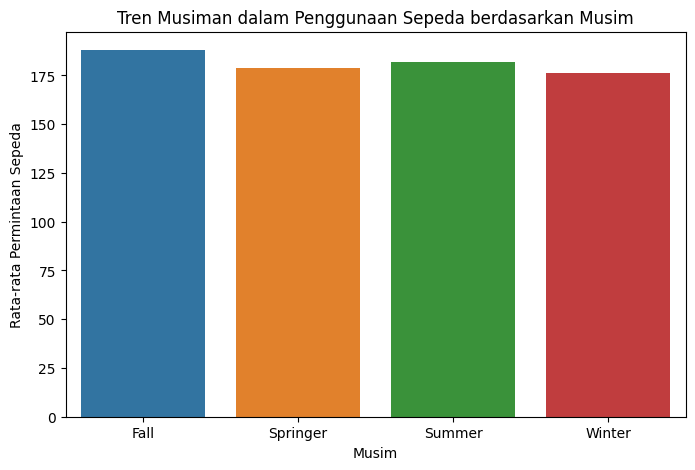

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='sum', data=rentals_per_season)
plt.title('Tren Musiman dalam Penggunaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.show()

## **Q4 : Apakah ada peningkatan atau penurunan yang signifikan selama hari libur?**

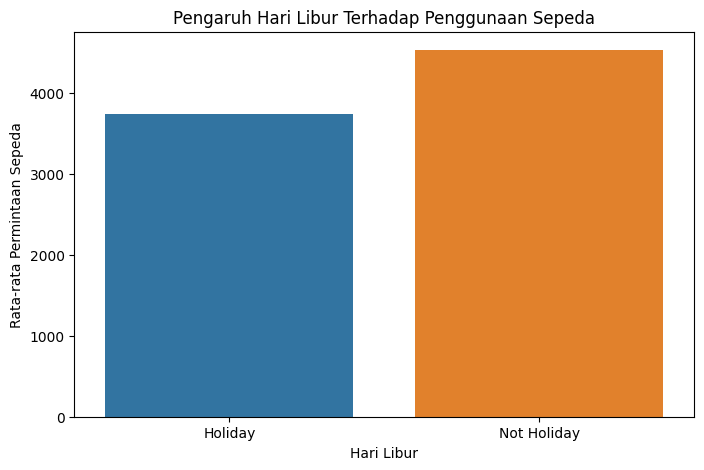

In [45]:
average_rentals_on_holiday = bike_day_df.groupby('holiday')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=average_rentals_on_holiday)
plt.title('Pengaruh Hari Libur Terhadap Penggunaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.show()

## **Q5 : Apa perbandingan antara pengguna terdaftar dan pengguna kasual dalam penggunaan sepeda?**

In [46]:
perbandingan_pengguna = bike_hour_df.groupby(['hr', 'yr'])[['registered', 'casual']].mean().reset_index()
print(perbandingan_pengguna)

    hr    yr  registered     casual
0    0  2011   33.565097   9.481994
1    0  2012   53.802740  10.827397
2    1  2011   20.797222   5.752778
3    1  2012   32.879121   7.247253
4    2  2011   14.463068   4.460227
5    2  2012   21.622590   5.074380
6    3  2011    7.271930   2.789474
7    3  2012   10.687324   2.645070
8    4  2011    4.112760   1.278932
9    4  2012    6.022222   1.230556
10   5  2011   13.396601   1.212465
11   5  2012   23.406593   1.604396
12   6  2011   53.806094   3.814404
13   6  2012   89.810440   4.505495
14   7  2011  146.451791  10.380165
15   7  2012  255.417582  11.728022
16   8  2011  243.796143  19.198347
17   8  2012  430.609890  24.153846
18   9  2011  139.454545  24.418733
19   9  2012  237.247253  37.346154
20  10  2011   94.892562  35.991736
21  10  2012  159.401099  56.934066
22  11  2011  110.236915  45.680441
23  11  2012  186.862637  73.362637
24  12  2011  137.890110  52.214286
25  12  2012  232.153846  84.373626
26  13  2011  135.129121  55

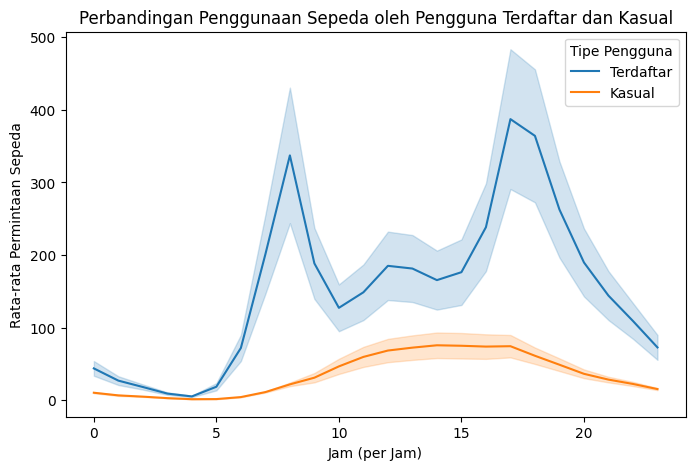

In [47]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='hr', y='registered', data=perbandingan_pengguna, label='Terdaftar')
sns.lineplot(x='hr', y='casual', data=perbandingan_pengguna, label='Kasual')
plt.title('Perbandingan Penggunaan Sepeda oleh Pengguna Terdaftar dan Kasual')
plt.xlabel('Jam (per Jam)')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.legend(title='Tipe Pengguna')
plt.show()

# **5. Conclusion**

### Berapa banyak orang yang menyewa sepeda per jam, bulan, dan tahun?
>  Dalam eksplorasi data sebelumnya, saya melihat bahwa jumlah orang yang menyewa sepeda **meningkat pada pukul 17:00 mungkin disebabkan oleh waktu berakhirnya jam kerja** dan cuaca yang cerah. **Bulan Agustus adalah musim panas, yang umumnya digunakan untuk bersepeda**, berkat cuaca hangat. **Peningkatan pada tahun 2012 mungkin terkait dengan faktor khusus yang memengaruhi tren** penggunaan sepeda saat itu.

### Bagaimana pengaruh cuaca terhadap permintaan sepeda?
>  Dalam eksplorasi data sebelumnya, **saya melihat bahwa rata-rata permintaan sepeda tertinggi terjadi pada hari dengan cuaca yang baik.** Hal ini menunjukkan bahwa cuaca cerah cenderung meningkatkan minat orang untuk menggunakan sepeda. Cuaca yang baik memberikan pengalaman berkendara yang lebih nyaman dan aman, yang mungkin menjadi alasan mengapa permintaan sepeda lebih tinggi pada hari-hari tersebut.

### Bagaimana variasi musiman dalam penggunaan sepeda?
> Berdasarkan data musim yang telah disediakan, dapat disimpulkan bahwa **puncak permintaan sepeda terjadi selama musim gugur (Fall).** Hal ini mungkin disebabkan oleh cuaca yang lebih nyaman dan aktivitas luar ruangan yang populer selama musim gugur.

### Bagaimana pengaruh hari libur terhadap penggunaan sepeda?
> Berdasarkan eksplorasi data, **saya dapat menyimpulkan bahwa penggunaan sepeda cenderung lebih tinggi pada hari-hari yang bukan merupakan hari libur.** Ini menunjukkan bahwa orang-orang lebih cenderung menggunakan sepeda sebagai alat transportasi pada hari kerja atau hari-hari biasa daripada pada hari libur. Variasi ini dalam penggunaan sepeda dapat memengaruhi kebijakan penyedia layanan sepeda, seperti jumlah sepeda yang tersedia atau penawaran promosi selama hari-hari kerja untuk meningkatkan penggunaan sepeda.

### Bagaimana perbandingan penggunaan sepeda oleh pengguna terdaftar dan kasual?
>  **Pengguna terdaftar cenderung lebih aktif dan konsisten dalam sewa sepeda.** Perbedaan ini bisa mengindikasikan bahwa pengguna terdaftar mungkin merupakan pengguna yang lebih terjadwal dan rutin dalam penggunaan layanan sepeda, sementara pengguna kasual lebih cenderung menggunakan sepeda secara sporadis atau mungkin sebagai wisatawan pada waktu tertentu.

# **5. Ekspor Data**

In [ ]:
data_clean = 'data_day.csv'
bike_day_df.to_csv(data_clean, index=False)

In [ ]:
from google.colab import files
files.download(data_clean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>